# Primer uporabe vizualizacije za tabelarične podatke
V tem zvezku demonstriramo delovanje metode za raziskovanje poljubnih projekcij tabelaričnih podatkov.

In [1]:
import sys 
sys.path.append('..')

from lib.tab_exploration.tab_explorer import TabExplorer
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(1)
%matplotlib inline

Za demonstracijo uporabimo podatke o ljudeh s titanika. Množica vsebuje zvezne in diskretne atribute. Izbrali smo nasldenjo podmnožico atributov: (spol, starost, cena vstopnice, pristanišče vkrcanja, razred vozovnice ).

In [2]:
df = pd.read_csv('../data/titanic.csv')
df = (df.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)
        .dropna(axis=0)
        .astype({'Pclass': object, 'Age': np.int32, 'Fare': np.float32}))
df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22,7.250000,S
1,1,female,38,71.283302,C
2,3,female,26,7.925000,S
3,1,female,35,53.099998,S
4,3,male,35,8.050000,S


Naslednjo funkcijo uporabimo za standardizacijo zveznih atributov

In [3]:
def standardize_continuous(df):
    df_numeric = df.select_dtypes(include=[np.number])
    df_other =  df.select_dtypes(exclude=[np.number])
    
    df_numeric = (df_numeric - df_numeric.mean())/df_numeric.std()
    return pd.concat([df_numeric, df_other], axis=1)

Za projekcijo podatkov uporabimo t-SNE, za razvrščanje pa DBSCAN.

In [4]:
tsne = TSNE()
dbscan = DBSCAN(eps=1.0)

X = pd.get_dummies(standardize_continuous(df)).values.astype(np.float32)
X_em = tsne.fit_transform(X)
clusters = dbscan.fit_predict(X)

Pridobljeno projekcijo in skupine lahko nato raziščemo.

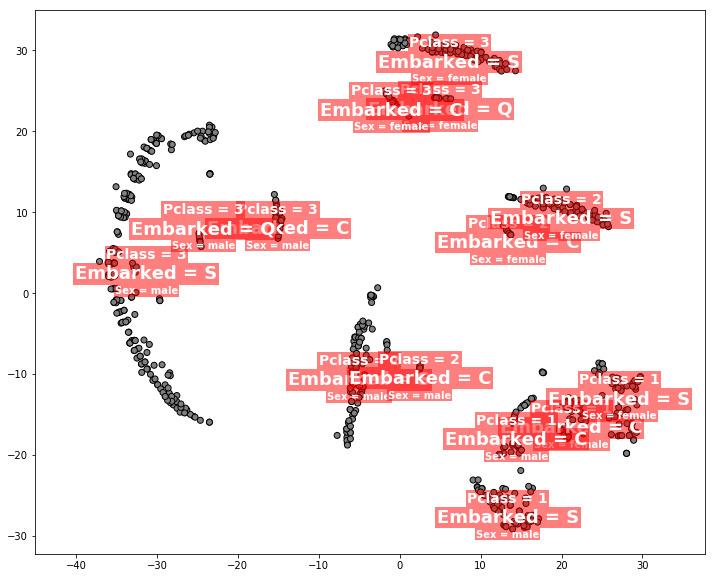

In [5]:
tab_explorer = TabExplorer(p_threshold=1e-2)
tab_explorer.fit(df, X_em, clusters)
fig, ax = tab_explorer.plot_static()

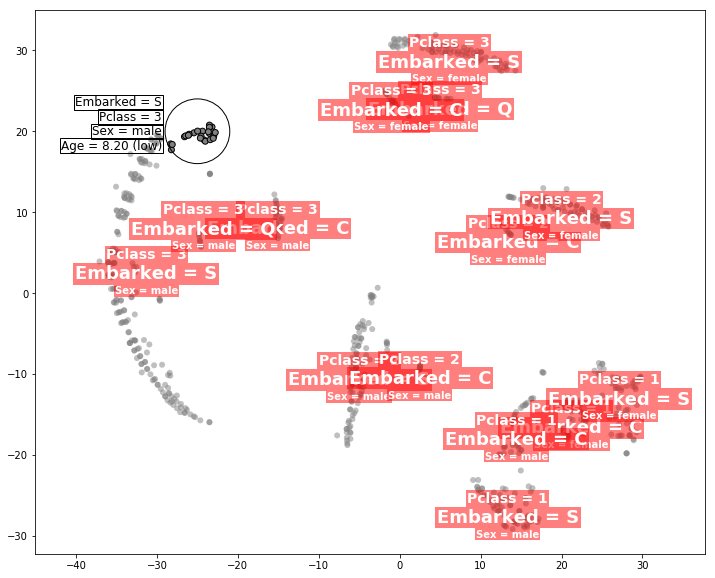

In [10]:
fig, ax = tab_explorer.plot_dynamic(-25, 20, 4)
fig